In [1]:
import random
def generate_values(n:int):
    """
    Return random value that [-n,n]
    """
    # x: [0,1]*2*n - n
    x = random.random() * 2 * n - n
    return x

# Giả sử đây là hàm Black_box cần tính min, mình ko biết hàm fx này là gì
def compute_fx(point):
    """
    - point: [x,y,result]
    We get only [x,y] to calculate result
    """
    x, y = point[:-1]
    return x**2 + y**2


def genetic_algo(list_points:list, epochs=100):
    """
    Parameters:
        + list_points: List of k-best [x,y,result] that sort by optimized score: Best --> Worst (by result)
        + epochs: The number of epochs to create the better points
    Return: List of k-best [x,y,result]
    """

    def only_last(point):
        return point[-1]

    if epochs == 0:
        return list_points
    else:  # Remake the better list of point
        # Sort the list to find the min results
        list_points.sort(key=only_last, reverse=False)

        # Cut the half of the list
        k_half = int(len(list_points) / 2)
        list_points = list_points[:k_half]

        # Create new k_half points from list_points to each next points
        for i in range(k_half):

            # new point = ([]+[])/2
            index1 = int(random.random() * (k_half-1))+1
            index2 = int(random.random() * (k_half-1))+1
            new_point = [
                (list_points[index1][j] + list_points[index2][j]) / 2
                for j in range(len(list_points[0]))
            ]
            new_point[-1] = compute_fx(new_point)
            # Append new point
            list_points.append(new_point)

        list_points.sort(key=only_last, reverse=False)
        
        # Mutation: Đột biến 1 point bất kì, [x,y,r] --> [2x,2y,new_r], percentage of mutation: 5%
        alpha = 0.05
        if random.random() < alpha:
            # Mutation a random point (double values)
            index = int(random.random() * k_half * 2)-1
            new_x = list_points[index][0] * 2
            new_y = list_points[index][1] * 2

            # CHange the new_result of this point
            list_points[index] = [new_x, new_y,None]
            list_points[index][-1] = compute_fx(list_points[index])
        
        # Recursion to the next generation
        
        return genetic_algo(list_points,epochs-1)
            

In [10]:
def only_last(point):
    return point[-1]
# Create list point
k = 50
# Generate random point [-n,n]
n = 100
list_points = []
for i in range(k):
    x = generate_values(n)
    y = generate_values(n)
    p = [x,y,compute_fx([x,y,None])]
    list_points.append(p)

# Show the list of random points before we train
list_points.sort(key=only_last)
list_points[:10]

[[-12.275337371680692, -16.590116094707824, 425.91585962446425],
 [-9.749379028252307, -27.016992706334136, 824.9682863306377],
 [-26.171840217307533, -18.974115971569574, 1044.9822972628476],
 [-32.431911329084855, -3.841981464629015, 1066.5896940321754],
 [25.053098894665055, 22.943722510327504, 1154.0721668567762],
 [-23.27322812710139, 24.92387159409199, 1162.8425226948889],
 [32.07461926627539, -18.385414310448624, 1366.8046604433735],
 [-32.5120402729178, 21.44652021397752, 1516.9859919963756],
 [-42.572838709197256, -5.202918376443705, 1839.51695539126],
 [17.612183699184, -43.16889009965219, 2173.7420870896512]]

# Find the minimum by Genetic Algorithm

In [15]:
bias = 0.000005
black_box_result = 0
result = black_box_result + bias

list_results = genetic_algo(list_points, epochs=100)
list_results.sort(key=only_last)
x, y, best_result = list_results[0]
print(f"Actual min = {black_box_result}")
print(f'Point ({x:.3f},{y:.3f}) gain the min: {best_result:.5f}')
print(f"Hiệu giữa kết quả dự đoán với kết quả black_box = {best_result-result}")


Actual min = 0
Point (0.000,0.000) gain the min: 0.00000
Hiệu giữa kết quả dự đoán với kết quả black_box = -4.999974213994354e-06


# Visual the difference cases

Text(0, 0.5, 'Frequency')

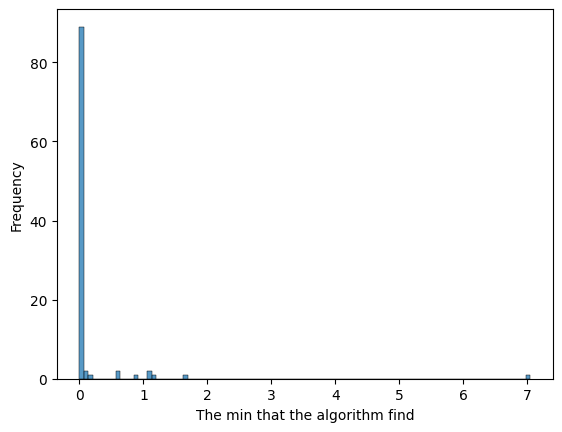

In [25]:
# Sẽ có vài trường hợp mô hình tìm mấy cái điểm sida, mình khảo sát tỉ lệ nhé
import matplotlib.pyplot as plt
import seaborn as sns

# Số lần chạy giải thuật
find = 100
ketqua = []
for i in range(find):
    list_results = genetic_algo(list_points, epochs=100)
    list_results.sort(key=only_last)
    x, y, best_result = list_results[0]
    ketqua.append(round(best_result, 3))

sns.histplot(ketqua,bins=100)
plt.xlabel("The min that the algorithm find")
plt.ylabel("Frequency")

# Như ae có thể thấy ở hình anh, thi thoảng min nó cũng đi xa lắc, nhma nhìn chung tỉ lệ quá nhỏ nhể :)))
# Thuật toán này áp dụng cho mọi hàm black_box fx để tìm min nhé! 
# Độ hiệu quả của thuật toán phụ thuộc vào độ lớn của k(số lượng tập mẫu thử) và độ ăn may :)))